<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
!wget https://raw.githubusercontent.com/lineality/DS-Unit-4-Sprint-2-Neural-Networks/master/module3-Intro-to-Keras/amesHousePrice.csv

--2019-12-11 21:40:47--  https://raw.githubusercontent.com/lineality/DS-Unit-4-Sprint-2-Neural-Networks/master/module3-Intro-to-Keras/amesHousePrice.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462135 (451K) [text/plain]
Saving to: ‘amesHousePrice.csv’

amesHousePrice.csv  100%[===================>] 451.30K  --.-KB/s    in 0.05s   

2019-12-11 21:40:48 (8.16 MB/s) - ‘amesHousePrice.csv’ saved [462135/462135]



In [2]:
import pandas as pd

df = pd.read_csv("amesHousePrice.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(df.shape)
df.describe()

(1460, 81)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.describe().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)

print(train.shape, test.shape)
train.head()

(1095, 81) (365, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
795,796,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,171000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
813,814,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,4,2007,COD,Normal,157900
906,907,20,RL,116.0,13501,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,255000
195,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500


In [9]:
from sklearn.preprocessing import normalize

# let's cut down to a few likely-looking numeric features for starters
X_train = train[['LotArea', 'OverallCond', 'OverallQual']]
X_test = test[['LotArea', 'OverallCond', 'OverallQual']]

y_train = train['SalePrice']
y_test = test['SalePrice']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1095, 3) (1095,) (365, 3) (365,)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse'])
model.fit(normalize(X_train), y_train.values, epochs=1000, validation_split=.10)

Train on 985 samples, validate on 110 samples
Epoch 1/1000
985/985 [==============================] - 0s 450us/sample - loss: 180934.5223 - mean_squared_error: 39213850624.0000 - val_loss: 183952.6182 - val_mean_squared_error: 39260852224.0000
Epoch 2/1000
985/985 [==============================] - 0s 57us/sample - loss: 180934.2973 - mean_squared_error: 39213772800.0000 - val_loss: 183952.3136 - val_mean_squared_error: 39260737536.0000
Epoch 3/1000
985/985 [==============================] - 0s 56us/sample - loss: 180933.8974 - mean_squared_error: 39213637632.0000 - val_loss: 183951.8463 - val_mean_squared_error: 39260573696.0000
Epoch 4/1000
985/985 [==============================] - 0s 58us/sample - loss: 180933.4041 - mean_squared_error: 39213449216.0000 - val_loss: 183951.3045 - val_mean_squared_error: 39260372992.0000
Epoch 5/1000
985/985 [==============================] - 0s 56us/sample - loss: 180932.7982 - mean_squared_error: 39213232128.0000 - val_loss: 183950.5955 - val_mean_

In [27]:
model.evaluate(X_test, y_test)
# way overfit!!!

365/365 [==============================] - 0s 32us/sample - loss: 814853953.2274 - mean_squared_error: 812322008099454976.0000


[814853953.2273972, 8.12322e+17]

In [29]:
from sklearn.metrics import r2_score

r2_score(y_test, model.predict(X_test))

# terrible!!

-132916114.16021143

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

# LR wins

0.651399264102746

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [1]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
import numpy as np
import matplotlib.pyplot as plt

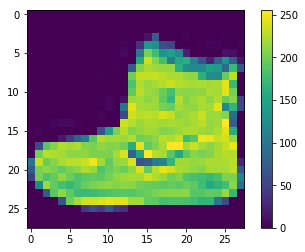

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

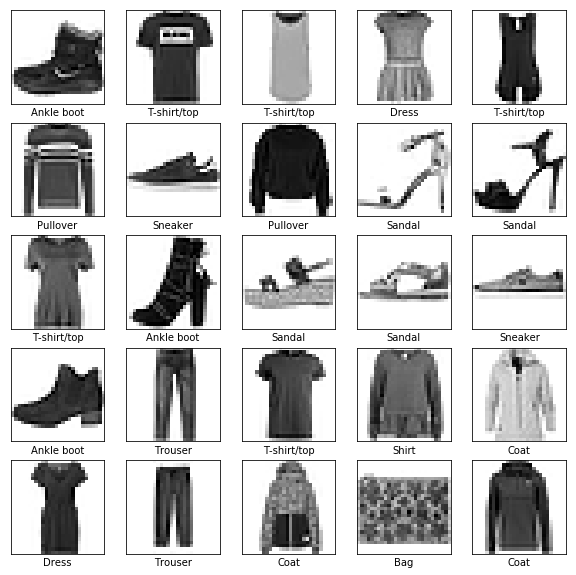

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4993 - acc: 0.8244
Epoch 2/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3758 - acc: 0.8631
Epoch 3/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3389 - acc: 0.8770
Epoch 4/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3147 - acc: 0.8845
Epoch 5/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2956 - acc: 0.8917
Epoch 6/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2814 - acc: 0.8950
Epoch 7/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2690 - acc: 0.8994
Epoch 8/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2578 - acc: 0.9043
Epoch 9/10
60000/60000 [==============================] - 5s 87us/

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3394 - acc: 0.8826

Test accuracy: 0.8826


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.